# 🎱 Predicting the Sale Price of 72 Billiards Club using Machine Learning

In this notebook, we are going through a real machine learning project with the goal of predicting the sales of the 72 Billiards Club Business based on hours, weekdays, and datetime.

## 1. Problem Definition
> How well we can predict the future sales based on hours and days. So that, we can see when the trend is up or down to  identify periods of increasing or decreasing demand.
## 2. Evaluation 
The evaluation metric for this competition is the RMSLE ( root mean square log error ) between the actual and predicted auction prices.

> **Note:** The goal for most regression evaluation metrics is to minimize the error. For instance, our goal for this project is to build a machine learning algorithm which minimizes RMSLE.
## 3. Data
The data is fetched from KioViet.vn API which belong privately to 72 Billiards Club Enterprise.
## 4. Feature


In [1]:
# Import all of neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Make the copy of the original data

In [2]:
# Read dataset using pandas
df = pd.read_csv('kioviet.csv', low_memory=False)

# make the copy
df_tmp = df.copy()


### Understanding the basic information

In [4]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5656 non-null   int64  
 1   Customer_Name  5656 non-null   object 
 2   Year           5656 non-null   int64  
 3   Month          5656 non-null   int64  
 4   Day            5656 non-null   int64  
 5   Hour           5656 non-null   int64  
 6   DayOfWeek      5656 non-null   object 
 7   Sales          5656 non-null   float64
 8   Status         5656 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 397.8+ KB


In [5]:
# Get summary of statistical summaries of numerical columns
df.describe()

,Id,Year,Month,Day,Hour,Sales
count,5.656000e+03,5656.0,5656.000000,5656.000000,5656.000000,5.656000e+03
mean,1.186848e+08,2023.0,11.568246,15.534123,13.824257,1.725908e+05
std,2.617821e+06,0.0,0.495364,7.556793,7.531946,1.167272e+05
min,1.142774e+08,2023.0,11.000000,1.000000,0.000000,0.000000e+00
25%,1.163392e+08,2023.0,11.000000,10.000000,11.000000,9.497600e+04
50%,1.187333e+08,2023.0,12.000000,15.000000,16.000000,1.511250e+05
75%,1.209007e+08,2023.0,12.000000,22.000000,20.000000,2.242370e+05
max,1.232270e+08,2023.0,12.000000,30.000000,23.000000,1.561890e+06


In [6]:
# check if any missing values
df.isna().sum()

Id               0
Customer_Name    0
Year             0
Month            0
Day              0
Hour             0
DayOfWeek        0
Sales            0
Status           0
dtype: int64

### Parsing dates

In [7]:
df.head(5)

,Id,Customer_Name,Year,Month,Day,Hour,DayOfWeek,Sales,Status
0,123227045,khách lẻ,2023,12,26,1,Tuesday,190000.0,Done
1,123227020,khách lẻ,2023,12,26,1,Tuesday,269500.0,Done
2,123226706,thế anh,2023,12,26,1,Tuesday,142865.0,Done
3,123226321,Chị Thư,2023,12,26,0,Tuesday,269221.0,Done
4,123226103,khách lẻ,2023,12,26,0,Tuesday,95000.0,Done


### PLOT CHART 

**Plot all histogram**

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

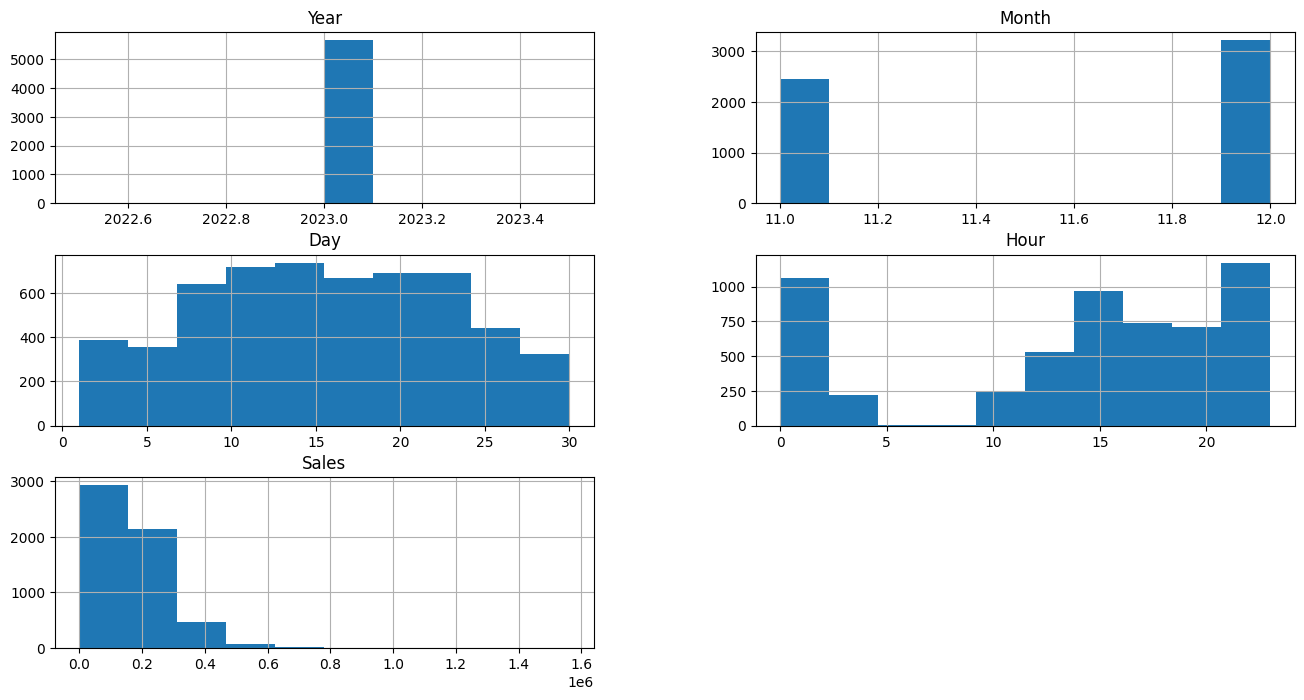

In [269]:
df.hist(figsize=(16,8))

**Plot bar chart total payments by hour of the day**

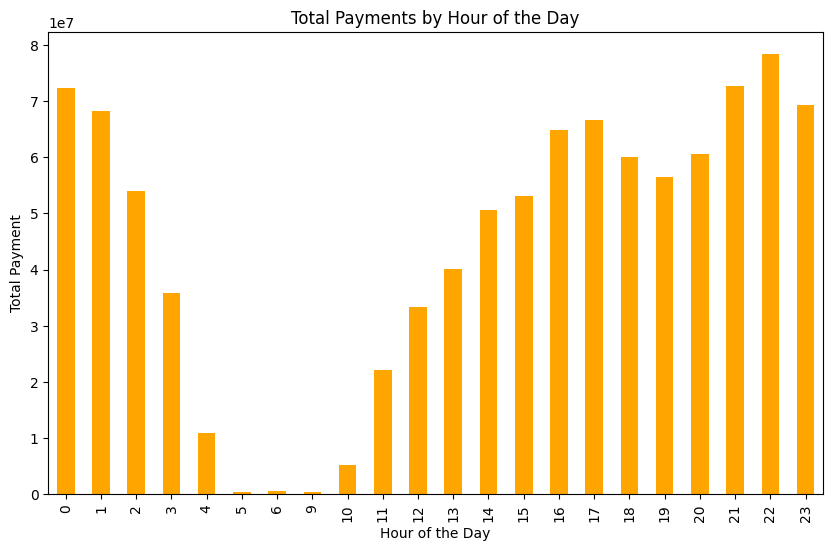

In [8]:
hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Total Payments by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Payment')
plt.grid(False)
plt.show()

**Plot bar chart total sales by weekday**

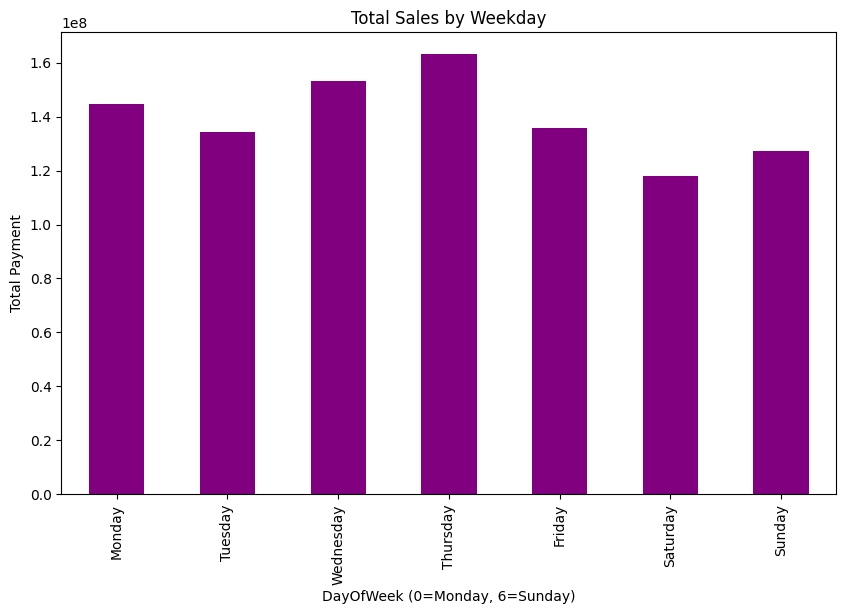

In [10]:
weekday_sales = df.groupby('DayOfWeek')['Sales'].sum()
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='purple') 
plt.title('Total Sales by Weekday')
plt.xlabel('DayOfWeek (0=Monday, 6=Sunday)')
plt.ylabel('Total Payment')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(False)
plt.show()


**Plot historam chart for total sales**

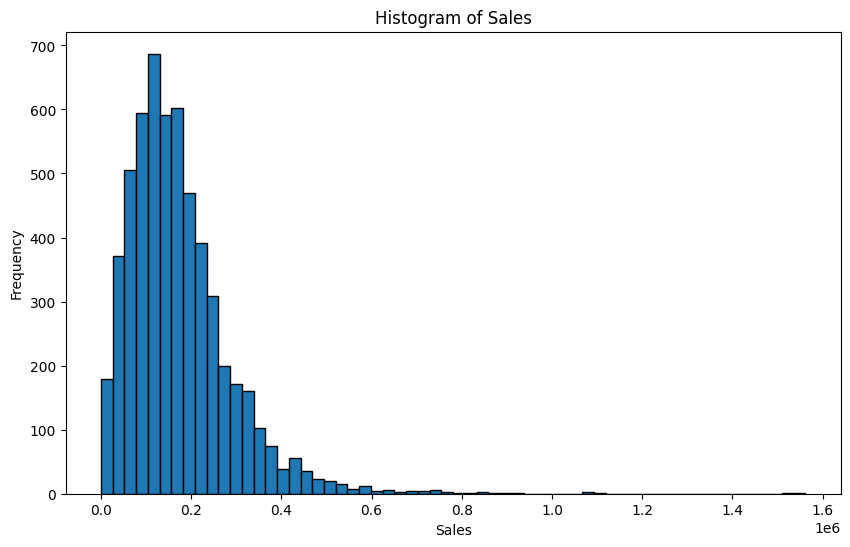

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=60, edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Plot Box**

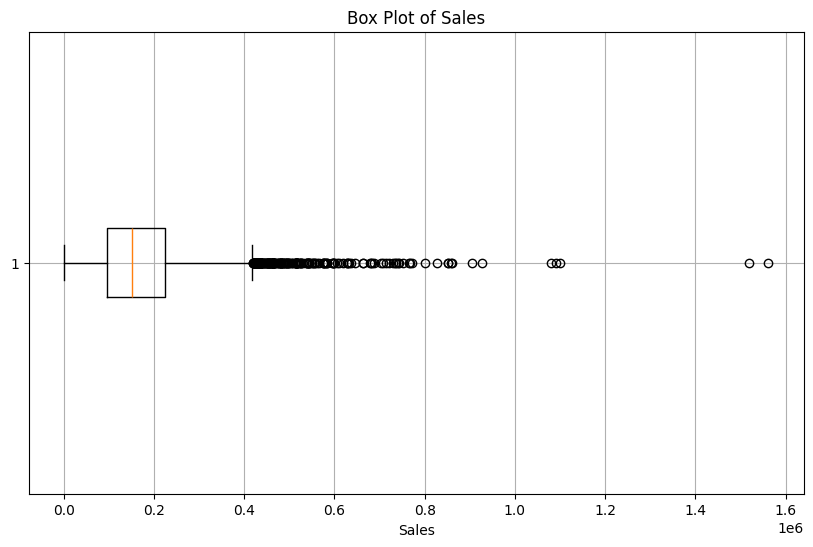

In [150]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'], vert=False)
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.grid(True)
plt.show()


**Plot Time Series with 7-days-moving-average**

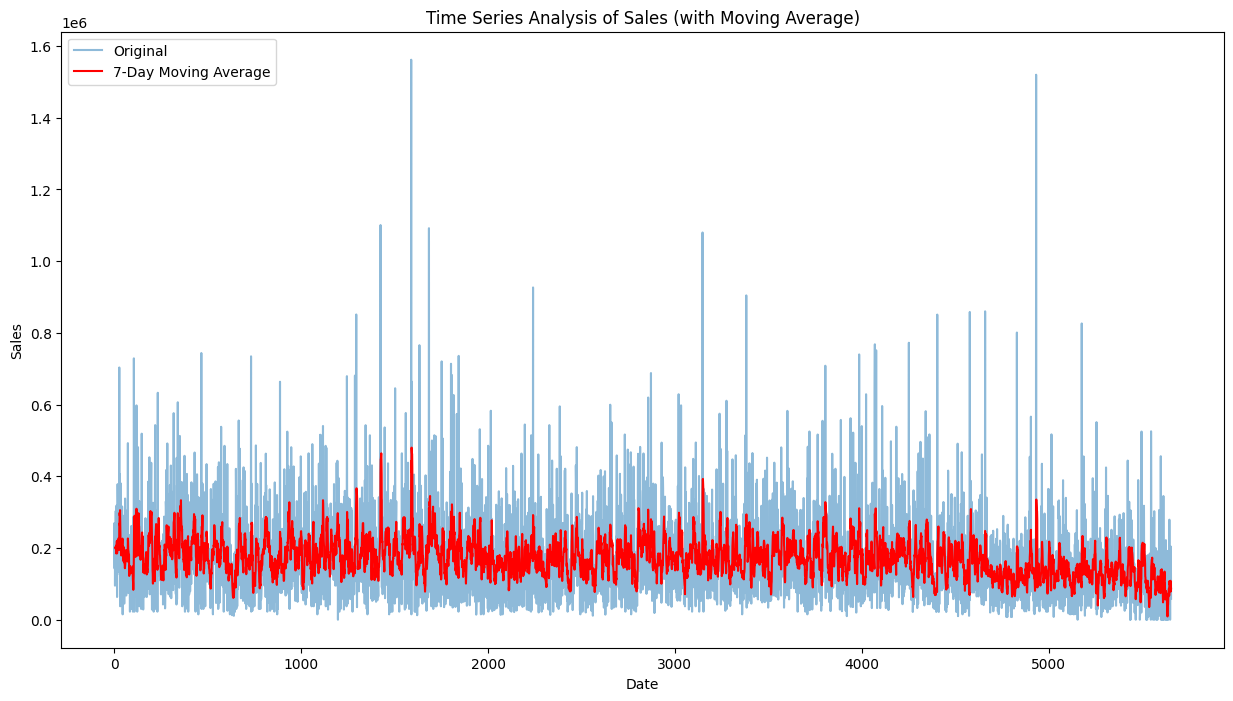

In [151]:
# Calculate a 7-day moving average for 'Total_Payment'
df['Sales_MA'] = df['Sales'].rolling(window=7).mean()

# Plotting the original and moving average time series
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Sales'], alpha=0.5, label='Original')
plt.plot(df.index, df['Sales_MA'], color='red', label='7-Day Moving Average')
plt.title('Time Series Analysis of Sales (with Moving Average)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(False)
plt.show()


### Re-prepare DataFrame

**Column Tranformation**

In [229]:
# The columns want to keep
columns_to_keep = ['Year', 'Month', 'Day', 'Hour', 'Sales']

# Select only the desired columns
df = df[columns_to_keep]

# Define a mapping from day names to numbers (Monday=0, ..., Sunday=6)
# day_to_num = {
#     'Monday': 0,
#     'Tuesday': 1,
#     'Wednesday': 2,
#     'Thursday': 3,
#     'Friday': 4,
#     'Saturday': 5,
#     'Sunday': 6
# }

# # Replace the 'DayOfWeek' column using the mapping
# df['DayOfWeek'] = df['DayOfWeek'].replace(day_to_num)

# # Convert 'Day of the Week' to a categorical variable
# df['DayOfWeek'] = df['DayOfWeek'].astype('category')


# Display the first few rows of the modified DataFrame
df.head(5)

,Year,Month,Day,Hour,Sales
0,2023,12,26,1,190000.0
1,2023,12,26,1,269500.0
2,2023,12,26,1,142865.0
3,2023,12,26,0,269221.0
4,2023,12,26,0,95000.0


**Scatter Plot**

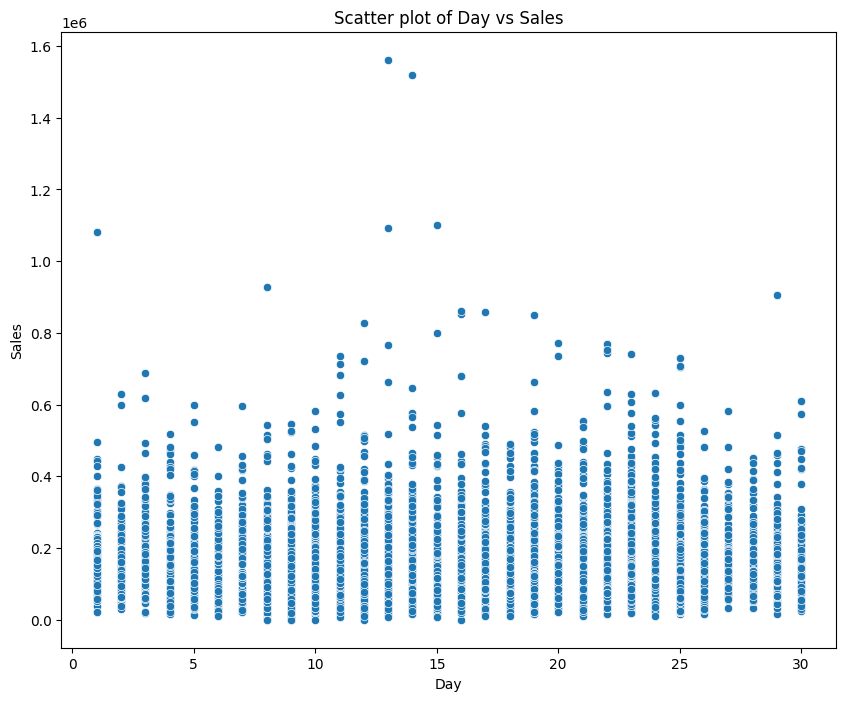

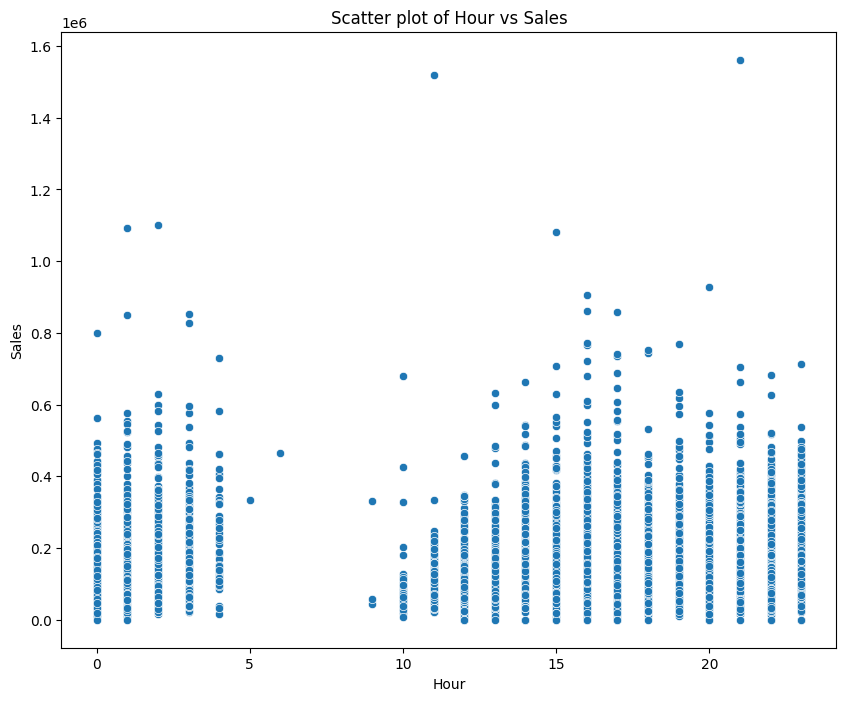

In [230]:
# Create scatter plots for each predictor against sales
predictor_columns = df.columns.drop('Sales')
for col in predictor_columns:
    if col not in ['Year', 'Month']:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=df[col], y=df['Sales'])
        plt.title(f'Scatter plot of {col} vs Sales')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()


**Sorted column ASC**

In [244]:
# Sort the DataFrame by 'Month' and 'Day' in ascending order
df_sorted = df.sort_values(by=['Month', 'Day', 'Hour'], ascending=True)

df_sorted.info()

df_sorted.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 5656 entries, 5655 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    5656 non-null   int64  
 1   Month   5656 non-null   int64  
 2   Day     5656 non-null   int64  
 3   Hour    5656 non-null   int64  
 4   Sales   5656 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 265.1 KB


,Year,Month,Day,Hour,Sales
5655,2023,11,8,9,59000.0
5654,2023,11,8,10,204000.0
5652,2023,11,8,11,128000.0
5653,2023,11,8,11,70000.0
5646,2023,11,8,12,279000.0


In [245]:
# Drop bias value 
df_sorted = df_sorted[df_sorted['Sales'] != 6555000]
df_sorted = df_sorted[df_sorted['Sales'] != 2836000]
df_sorted.head(5)

,Year,Month,Day,Hour,Sales
5655,2023,11,8,9,59000.0
5654,2023,11,8,10,204000.0
5652,2023,11,8,11,128000.0
5653,2023,11,8,11,70000.0
5646,2023,11,8,12,279000.0


### Final Data Process Check

**Check na values**

In [246]:
# Check if any na values
df_sorted.isna().sum()

Year     0
Month    0
Day      0
Hour     0
Sales    0
dtype: int64

**Check duplicated**

In [247]:
# Check for duplicate rows in the entire DataFrame
df_sorted.duplicated().sum()

112

**Fill 0 values in the `Sales` column to sales_median**

In [248]:
# Calculate the median of the non-zero values in the 'Sales' column
sales_median = df_sorted.loc[df_sorted['Sales'] != 0, 'Sales'].median()
# Replace zero values with the calculated median
df_sorted['Sales'] = df_sorted['Sales'].replace(0, sales_median)

**Show final data**

In [249]:
df_sorted.head(5)

,Year,Month,Day,Hour,Sales
5655,2023,11,8,9,59000.0
5654,2023,11,8,10,204000.0
5652,2023,11,8,11,128000.0
5653,2023,11,8,11,70000.0
5646,2023,11,8,12,279000.0


**Check shape**

In [250]:
df_sorted.shape

(5656, 5)

## 5. Modelling

### Import models and evaluates

In [267]:
 # Import machine learning models needed
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


### Initialize the models

In [259]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)


### Data split

In [260]:
X = df_sorted[['Year', 'Month', 'Day', 'Hour']]
y = df_sorted['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LINEAR REGRESSION

In [264]:
linear_model.fit(X_train, y_train)
print('The model score is:', linear_model.score(X_train, y_train))
linear_predictions = linear_model.predict(X_test)
print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, linear_predictions))
print("MAE:", mean_absolute_error(y_test, linear_predictions))
print("R2 Score:", r2_score(y_test, linear_predictions))

The model score is: 0.018538338753764427
Linear Regression Performance:
MSE: 13992921468.76574
MAE: 81699.22648086549
R2 Score: 0.031111914889273007


### RANDOM FOREST REGRESSOR

In [265]:
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print('The model score is:', rf_model.score(X_train, y_train))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("R2 Score:", r2_score(y_test, rf_predictions))

The model score is: 0.24997758255300728
MSE: 16724377779.00875
MAE: 89328.9776842435
R2 Score: -0.1580176732315699


### XGBOOST REGRESSOR

In [266]:
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print('The model score is:', xgb_model.score(X_train, y_train))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("R2 Score:", r2_score(y_test, xgb_predictions))

The model score is: 0.23731958451533264
MSE: 15847322802.010832
MAE: 86341.87549345738
R2 Score: -0.09728924571218767
